# **Amelia Lusiana**
**Mini Project Predict Customer Clicked Ads Classification by Using Machine Learning**

# Part 1
1. Upload file dataset
2. Buat analisis univariate pada kolom umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak(Hint: Perhatikan distribusi pada setiap kolom pada dataset)
3. Buatlah bivariate analysis pada variable yang telah diteliti pada univatriate analysis (Hint:Perhatikan hubungan antar kolom pada dataset)
4. Buatlah korelasi antar kolom dan lakukan multivariate analysis (Hint: Carilah hubungan antar kolom yang memiliki nilai korelasi yang tinggi)

## 1. Upload Dataset

In [ ]:
!pip install feature_engine
!pip install -U ppscore

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ppscore as pps
import io
from google.colab import files
import plotly.graph_objects as go
import pylab
import scipy.stats as st
import math
import time
import sklearn.cluster as cluster
from scipy.stats import kstest
from datetime import datetime, date
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
#data prosesing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from feature_engine import transformation as vt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 7.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=b6746a79ac1dacfc9922881cf25ad503ebaedc26087e812e0942968b9d0d9888
  Stored in directory: /root/.cache/pip/wheels/5c/80/75/b631985b161d4a29cc0cf94b5f64b00be6297b0968ff1337ce
Successfully built ppscore


In [ ]:
#1. upload data
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Clicked Ads Dataset.csv']))

Saving Clicked Ads Dataset.csv to Clicked Ads Dataset.csv


In [ ]:
df.shape

(1000, 11)

In [ ]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
#cek null data
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
#isi null kolom Daily Time Spent on Site
df['Daily Time Spent on Site'].fillna(value = df['Daily Time Spent on Site'].median(), inplace = True)

In [ ]:
#isi null kolom Area Income
df['Area Income'].fillna(value = df['Area Income'].median(), inplace = True)

In [ ]:
#isi null kolom Daily Internet
df['Daily Internet Usage'].fillna(value = df['Daily Internet Usage'].median(), inplace = True)

In [ ]:
#mengubah kolom Male menjadi kolom Gender
df['Gender'] = df['Male'].replace({'Perempuan': 0, 'Laki-Laki': 1})
df['Gender'] = df['Gender'].fillna(0)

In [ ]:
#rubah datatype 'Gender' float to int
df['Gender']  = df['Gender'].astype('int')

In [ ]:
#hapus kolom 'Male'
df=df.drop(['Male'],axis=1)

In [ ]:
#mengubah kolom Clicked on Ad menjadi numeric
df['Clicked on Ad'] = df['Clicked on Ad'].replace({'No': 0, 'Yes': 1})
df['Clicked on Ad'] = df['Clicked on Ad'].astype('int')

In [ ]:
#cek data null lagi
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
Gender                      0
dtype: int64

In [ ]:
#cek data duplicated
df.duplicated().sum()

0

In [ ]:
#rubah data type kolom Timestamp jadi datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')

In [ ]:
#rubah data type kolom Daily Time Spent on Site jadi time
#df['Daily Time Spent on Site'] = pd.to_timedelta(df['Daily Time Spent on Site'], unit='s')

In [ ]:
cat = df.select_dtypes(include='object')
catcol = cat.columns
num = df.select_dtypes(include=['int64', 'float64'])
numcol = num.columns

In [ ]:
for col in catcol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

Value counts kolom province:
Daerah Khusus Ibukota Jakarta    253
Jawa Barat                       210
Jawa Timur                        90
Banten                            76
Jawa Tengah                       53
Sumatra Utara  

In [ ]:
for col in numcol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom Daily Time Spent on Site:
68.11    14
84.53     3
77.05     3
78.76     3
75.55     3
         ..
61.09     1
65.77     1
37.87     1
60.91     1
45.01     1
Name: Daily Time Spent on Site, Length: 890, dtype: int64

Value counts kolom Age:
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

Value counts kolom Area Income:
399068320.0    14
412763540.0     1
488639900.0     1
422206330.0     1
471261000.0     1
               ..
423854620.0     1
405883100.0     1
369154310.0     1
326576250.0     1
209130600.0     1
Name: Area Income, Length: 987, dtype: int64

Value counts kolom Daily Internet Usage:
182.65    1

## 2. Buat analisis univariate pada kolom umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak.


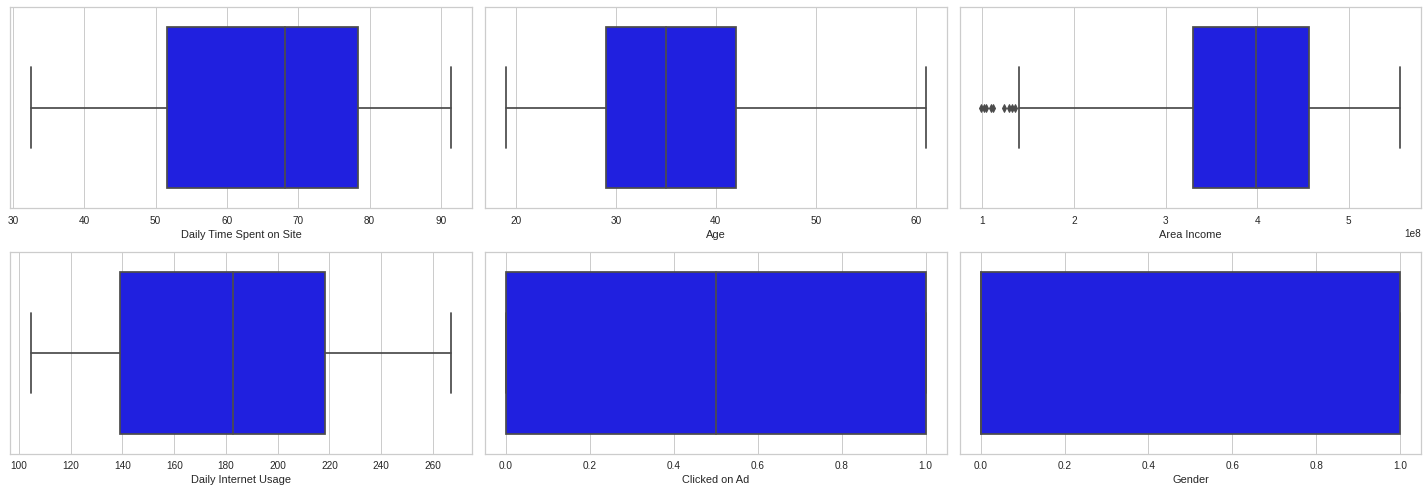

In [ ]:
plt.figure(figsize=(20,7))
for i in range(0, len(numcol)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[numcol[i]], color='blue', orient='n')
    plt.tight_layout()

**Observasi**

Hampir semua kolom berdistribusi normal, hanya kolom Area Income yang memiliki outlier.

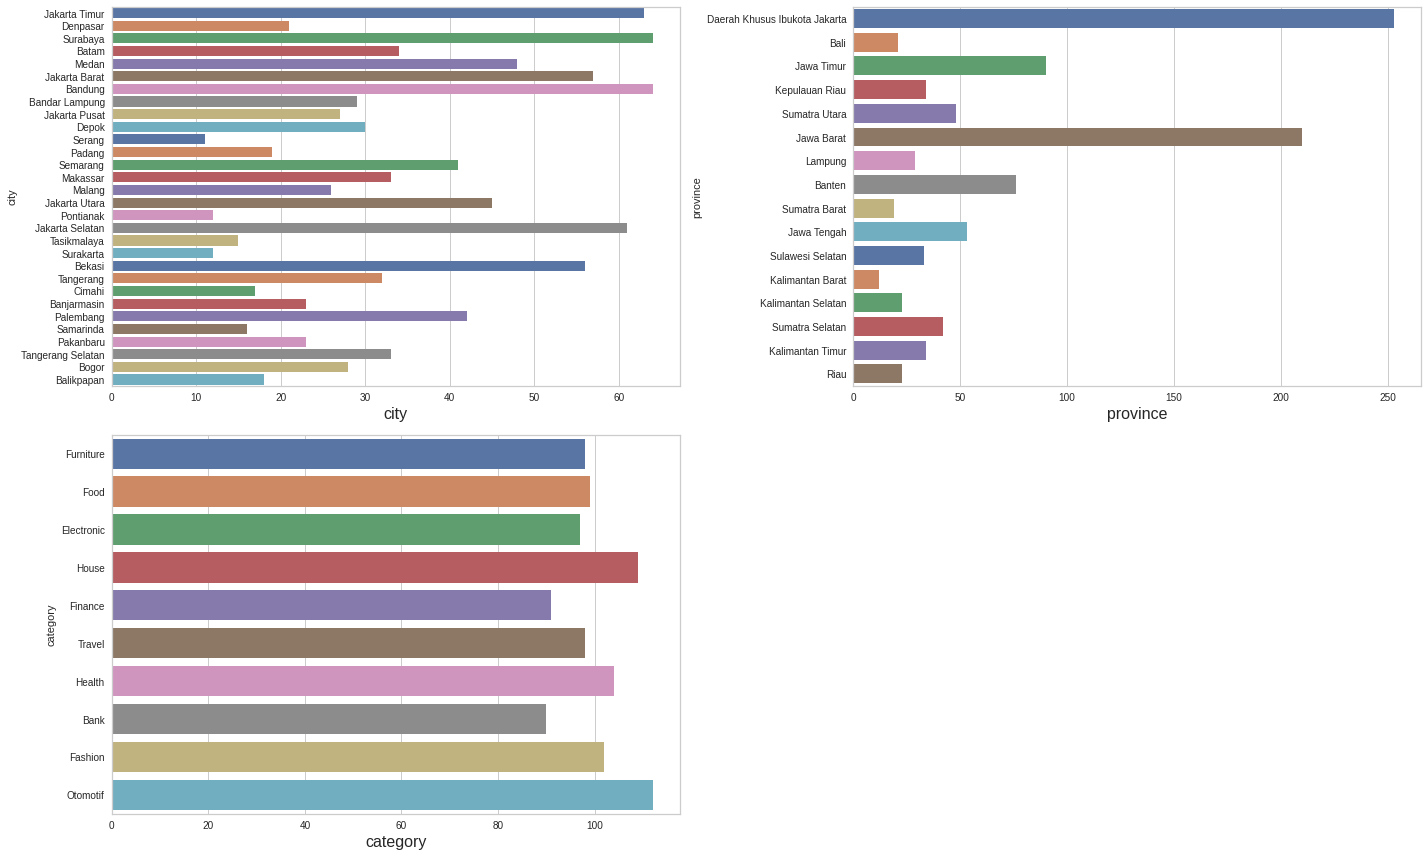

In [ ]:
plt.figure(figsize = (20,12))
for i in range(0, len(catcol)):
    plt.subplot(2, 2, i+1)
    sns.countplot(y=df[catcol[i]], palette='deep', orient='h')
    plt.tight_layout()
    plt.xlabel(xlabel=catcol[i],fontsize=16)

**Observasi**

Pengguna Terbanyak ada di Kota Jakarta Timur, Surabaya, Bandung, dan Jakarta Selatan.
Pengguna Terbanyak ada di Provinsi DKI Jakarta, Surabaya, dan Jawa Barat.
Pengguna Terbanyak melihat kategori House, Health dan Fashion.

In [ ]:
a = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

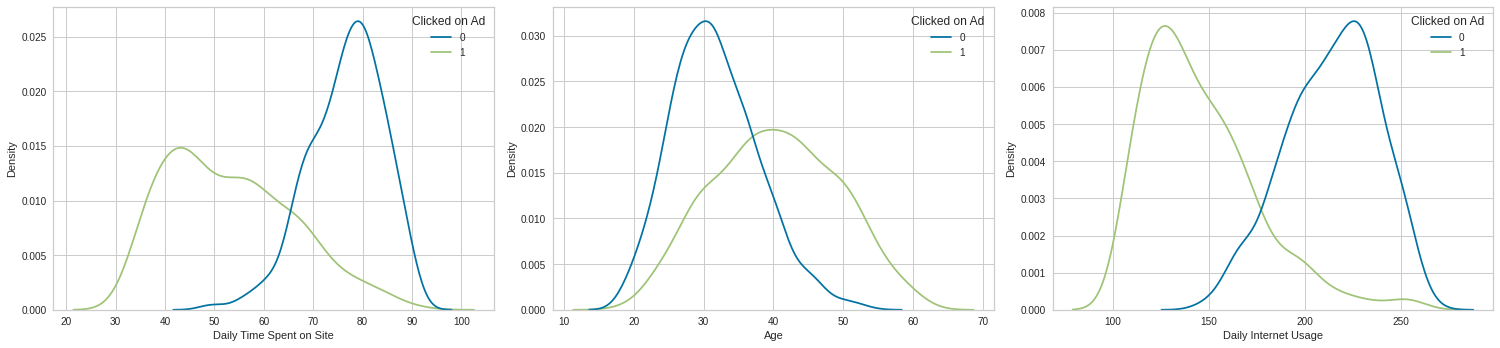

In [ ]:
plt.figure(figsize=(21, 5))
for i in range(0, len(a)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(x=df[a[i]], color='red', hue=df['Clicked on Ad'])
    plt.tight_layout()

**Observasi**

Dari semua kolom terlihat perbedaan menonjol yang klik iklan dengan yang tidak.
Banyak pengguna yang klik iklan dengan Daily Time Spent on Site 30-60 menit, Berumur 40-60 tahun, dan Daily Internet Usage sebesar 100-175.

## 3. Buatlah bivariate analysis pada variable yang telah diteliti pada univatriate analysis.

<Figure size 1080x1080 with 0 Axes>

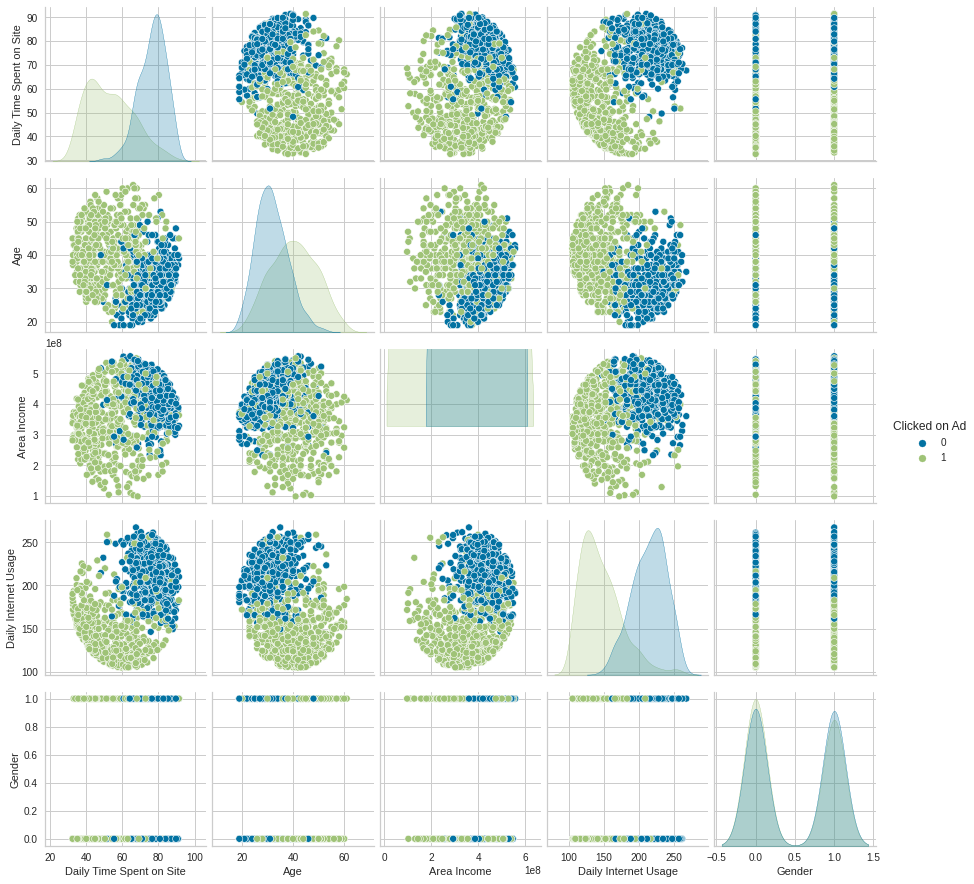

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde', hue='Clicked on Ad')
plt.show()

## 4. Buatlah korelasi antar kolom dan lakukan multivariate analysis.

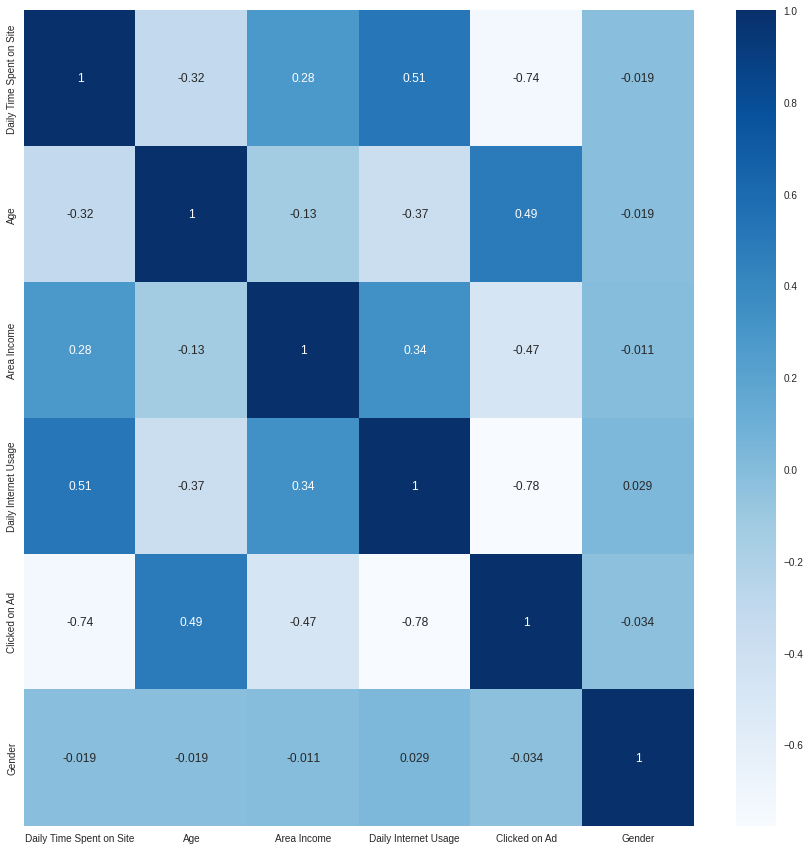

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(method='spearman'), cmap='Blues', annot=True)
plt.show()

**Observasi**

Korelasi antar fitur yang cukup kuat adalah kolom 'Daily Internet Usage' dengan 'Daily Time Spent on Site' dan 'Umur' dengan 'Clicked on Ad'.

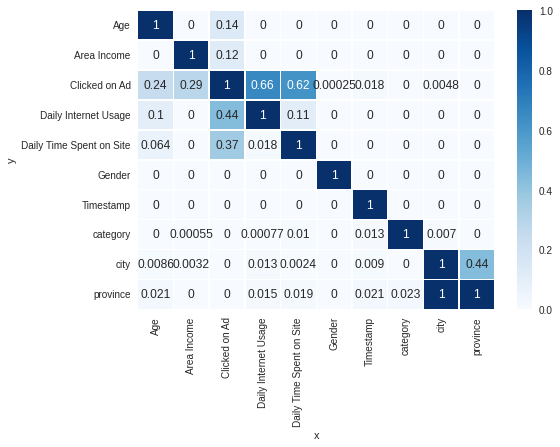

In [ ]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

**Observasi**

Dari matrix diatas dapat dilihat juga hubungan antara fitur 'Clicked on Ad' dengan 'Daily Internet Usage' dan 'Daily Time Spent on Site' dengan 'Age'.

# Part 2
1. Bersihkan dataset dari outliers
2. Lakukan feature encoding pada dataset
3. Lakukan ekstraksi pada kolom yang berhubungan dengan waktu (Hint: Buatlah kolom baru untuk mengekstraksi data waktu menjadi tahun, bulan, pekan, dan hari.)
4. Split data menjadi feature dan target (Hint: Pilih satu kolom menjadi target dan sisanya menjadi feature data)


##1. Bersihkan dataset dari outliers

In [ ]:
#initialisasi copy df
df1 = df.copy()

In [ ]:
#menghapus outlier kolom Area Income
Q1 = df1['Area Income'].quantile(0.05)
Q3 = df1['Area Income'].quantile(0.95)
IQR = Q3 - Q1
df1 = df1[(df1['Area Income'] >= Q1 - 1.5*IQR) & (df1['Area Income'] <= Q3 + 1.5*IQR)]

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,6.497087e+01,1.574539e+01,32.60,5.154500e+01,6.811000e+01,7.835250e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,1000.0,3.850493e+08,9.347971e+07,97975500.00,3.298201e+08,3.990683e+08,4.566932e+08,5.563936e+08
Daily Internet Usage,1000.0,1.798943e+02,4.362892e+01,104.78,1.390175e+02,1.826500e+02,2.182875e+02,2.670100e+02
Clicked on Ad,1000.0,5.000000e-01,5.002502e-01,0.00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00
Gender,1000.0,4.790000e-01,4.998088e-01,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


## 2. Lakukan feature encoding pada dataset

In [ ]:
#melakukan label encoder terhadap kolom province
le_cat = preprocessing.LabelEncoder()
df1['province']= le_cat.fit_transform(df['province'])

In [ ]:
#melakukan one hot encoding terhadap kolo city dan category
oh_cat = ['city', 'category']
df_oh = pd.get_dummies(df1[oh_cat])

In [ ]:
#menggabungkan data encoding
df1 = df1.drop(oh_cat,axis=1).merge(df_oh, left_index=True, right_index=True)

##3. Lakukan ekstraksi pada kolom yang berhubungan dengan waktu

In [ ]:
#melakukan ekstaksi jam, hari, minggu, dan bulan
df1['Month'] = df1['Timestamp'].dt.month
df1['Day of month'] = df1['Timestamp'].dt.day
df1['Day of week'] = df1['Timestamp'].dt.dayofweek
df1['Hour'] = df1['Timestamp'].dt.hour  
df1 = df1.drop(['Timestamp'], axis=1)

In [ ]:
#merubah data type menjadi uint8
nums = df1.select_dtypes(include=['int64', 'float64']).columns.to_list()

for x in nums:
    df1[x] = df1[x].astype('uint8')

In [ ]:
df1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad', 'province', 'Gender',
       'city_Balikpapan', 'city_Bandar Lampung', 'city_Bandung',
       'city_Banjarmasin', 'city_Batam', 'city_Bekasi', 'city_Bogor',
       'city_Cimahi', 'city_Denpasar', 'city_Depok', 'city_Jakarta Barat',
       'city_Jakarta Pusat', 'city_Jakarta Selatan', 'city_Jakarta Timur',
       'city_Jakarta Utara', 'city_Makassar', 'city_Malang', 'city_Medan',
       'city_Padang', 'city_Pakanbaru', 'city_Palembang', 'city_Pontianak',
       'city_Samarinda', 'city_Semarang', 'city_Serang', 'city_Surabaya',
       'city_Surakarta', 'city_Tangerang', 'city_Tangerang Selatan',
       'city_Tasikmalaya', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel', 'Month', 'Day of month',
       'Day of week', 'Ho

## 4. Split data menjadi feature dan target

In [ ]:
X = df1[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'province', 'Gender', 'city_Balikpapan','city_Bandar Lampung', 'city_Bandung',
         'city_Banjarmasin', 'city_Batam', 'city_Bekasi', 'city_Bogor', 'city_Cimahi', 'city_Denpasar', 'city_Depok', 'city_Jakarta Barat', 'city_Jakarta Pusat',
         'city_Jakarta Selatan', 'city_Jakarta Timur', 'city_Jakarta Utara', 'city_Makassar', 'city_Malang', 'city_Medan', 'city_Padang','city_Pakanbaru',
         'city_Palembang', 'city_Pontianak', 'city_Samarinda', 'city_Semarang', 'city_Serang', 'city_Surabaya', 'city_Surakarta', 'city_Tangerang',
         'city_Tangerang Selatan', 'city_Tasikmalaya', 'category_Bank', 'category_Electronic', 'category_Fashion', 'category_Finance', 'category_Food',
         'category_Furniture', 'category_Health', 'category_House', 'category_Otomotif', 'category_Travel', 'Month', 'Day of month', 'Day of week', 'Hour']]
y = df1['Clicked on Ad']

# Part 3
1. Bagilah data secara terpisah yang nanti akan digunakan sebagai data train dan data test (Hint: "Data train 70-80% dan Data test 20-30%")
2. Buatlah dua eksperimen model machine learning dengan beberapa jenis algoritma model machine learning, dimana eksperimen pertama tanpa menggunakan normalisasi data, dan yang kedua menggunakan normalisasi data. (Hint: Gunakan model machine learning yang sama pada kedua experiment tersebut.)
3. Buatlah evaluasi model menggunakan confusion matrix serta tunjukan feature important dari hasil model tersebut.(Hint: Perhatikan nilai presentasi tertinggi dari salah satu confusion matrix yang sudah ditentukan pada setiap evaluasi model, serta ambil 2 fitur utama yang dapat menentukan keberhasilan marketing.)

##1. Bagilah data secara terpisah yang nanti akan digunakan sebagai data train dan data test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##2. Buatlah dua eksperimen model machine learning dengan beberapa jenis algoritma model machine learning, dimana eksperimen pertama tanpa menggunakan normalisasi data, dan yang kedua menggunakan normalisasi data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Logistic Regression sebelum normalisasi data

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.931280    0.952381   0.94125    0.941830      0.941540
recall       0.956204    0.925450   0.94125    0.940827      0.941250
f1-score     0.943577    0.938722   0.94125    0.941150      0.941217
support    411.000000  389.000000   0.94125  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[393  18]
 [ 29 360]]

Test Result:
Accuracy Score: 91.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.900000    0.927273     0.915    0.913636      0.915136
recall      0.910112    0.918919     0.915    0.914516      0.915000
f1-score    0.905028    0.923077     0.915    0.914052      0.915045
support    89.000000  111.000000     0.915  200.000000    200.00000

Random Forest sebelum normalisasi data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    411.0  389.0       1.0      800.0         800.0
_______________________________________________
Confusion Matrix: 
 [[411   0]
 [  0 389]]

Test Result:
Accuracy Score: 92.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.929412    0.913043      0.92    0.921228      0.920327
recall      0.887640    0.945946      0.92    0.916793      0.920000
f1-score    0.908046    0.929204      0.92    0.918625      0.919788
support    89.000000  111.000000      0.92  200.000000    200.000000
_______________________________________________
Conf

Decision Tree Classifier sebelum normalisasi data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    411.0  389.0       1.0      800.0         800.0
_______________________________________________
Confusion Matrix: 
 [[411   0]
 [  0 389]]

Test Result:
Accuracy Score: 90.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.888889    0.918182     0.905    0.903535      0.905146
recall      0.898876    0.909910     0.905    0.904393      0.905000
f1-score    0.893855    0.914027     0.905    0.903941      0.905050
support    89.000000  111.000000     0.905  200.000000    200.000000
_______________________________________________
Conf

Normalisasi data dengan MinMax scaler

In [ ]:
mms = MinMaxScaler()
X_train_scal = ss.fit_transform(X_train)
X_test_scal = ss.transform(X_test)
X_train_scal = pd.DataFrame(X_train_scal)
X_test_scal = pd.DataFrame(X_test_scal)

In [ ]:
X_train_scal.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,8.000000e+02,8.000000e+02,8.000000e+02,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,8.881784e-17,1.842970e-16,-1.132427e-16,9.325873e-17,5.329071e-17,-6.439294e-17,0.000000,-2.664535e-17,3.996803e-17,-1.998401e-17,...,1.154632e-16,-1.387779e-17,-3.108624e-17,3.219647e-17,2.886580e-17,-2.886580e-17,-4.884981e-17,5.329071e-17,-2.442491e-17,-1.221245e-16
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626,1.000626e+00,1.000626e+00,1.000626e+00,...,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-2.062010e+00,-1.931612e+00,-1.737187e+00,-3.918056e+00,-1.194954e+00,-9.535764e-01,-0.133460,-1.720495e-01,-2.554336e-01,-1.559737e-01,...,-3.425178e-01,-3.402354e-01,-3.310137e-01,-3.493131e-01,-3.425178e-01,-3.216338e-01,-1.456643e+00,-1.646305e+00,-1.515147e+00,-1.672202e+00
25%,-8.623412e-01,-7.986188e-01,-8.754772e-01,-8.777300e-01,-7.351353e-01,-9.535764e-01,-0.133460,-1.720495e-01,-2.554336e-01,-1.559737e-01,...,-3.425178e-01,-3.402354e-01,-3.310137e-01,-3.493131e-01,-3.425178e-01,-3.216338e-01,-9.382647e-01,-8.422491e-01,-1.018174e+00,-8.011692e-01
50%,2.110471e-01,-1.188227e-01,4.008972e-02,1.065481e-01,-5.052259e-01,-9.535764e-01,-0.133460,-1.720495e-01,-2.554336e-01,-1.559737e-01,...,-3.425178e-01,-3.402354e-01,-3.310137e-01,-3.493131e-01,-3.425178e-01,-3.216338e-01,9.849188e-02,-3.819268e-02,-2.422744e-02,-7.530809e-02
75%,8.424520e-01,6.742728e-01,8.748714e-01,8.720978e-01,6.443211e-01,1.048684e+00,-0.133460,-1.720495e-01,-2.554336e-01,-1.559737e-01,...,-3.425178e-01,-3.402354e-01,-3.310137e-01,-3.493131e-01,-3.425178e-01,-3.216338e-01,6.168702e-01,8.807289e-01,9.697188e-01,9.408974e-01
max,1.663278e+00,2.826961e+00,1.682725e+00,1.659520e+00,2.253687e+00,1.048684e+00,7.492854,5.812281e+00,3.914911e+00,6.411339e+00,...,2.919556e+00,2.939142e+00,3.021023e+00,2.862761e+00,2.919556e+00,3.109126e+00,1.653627e+00,1.799651e+00,1.466692e+00,1.666758e+00


In [ ]:
def print_score(clf, X_train_scal, y_train, X_test_scal, y_test, train=True):
    if train:
        pred = clf.predict(X_train_scal)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_scal)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Logistic Regression setelah normalisasi data

In [ ]:
lr_clf_scaled = LogisticRegression(solver='liblinear')
lr_clf_scaled.fit(X_train_scal, y_train)

print_score(lr_clf_scaled, X_train_scal, y_train, X_test_scal, y_test, train=True)
print_score(lr_clf_scaled, X_train_scal, y_train, X_test_scal, y_test, train=False)

Train Result:
Accuracy Score: 95.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.938679    0.965426   0.95125    0.952052      0.951685
recall       0.968370    0.933162   0.95125    0.950766      0.951250
f1-score     0.953293    0.949020   0.95125    0.951157      0.951215
support    411.000000  389.000000   0.95125  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[398  13]
 [ 26 363]]

Test Result:
Accuracy Score: 92.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.911111    0.936364     0.925    0.923737      0.925126
recall      0.921348    0.927928     0.925    0.924638      0.925000
f1-score    0.916201    0.932127     0.925    0.924164      0.925040
support    89.000000  111.000000     0.925  200.000000    200.00000

Random Forest setelah normalisasi data

In [ ]:
rf_clf_scal = RandomForestClassifier(n_estimators=1000)
rf_clf_scal.fit(X_train_scal, y_train)

print_score(rf_clf_scal, X_train_scal, y_train, X_test_scal, y_test, train=True)
print_score(rf_clf_scal, X_train_scal, y_train, X_test_scal, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    411.0  389.0       1.0      800.0         800.0
_______________________________________________
Confusion Matrix: 
 [[411   0]
 [  0 389]]

Test Result:
Accuracy Score: 91.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.928571    0.905172     0.915    0.916872      0.915585
recall      0.876404    0.945946     0.915    0.911175      0.915000
f1-score    0.901734    0.925110     0.915    0.913422      0.914708
support    89.000000  111.000000     0.915  200.000000    200.000000
_______________________________________________
Conf

Decision Tree Classifier setelah normalisasi data

In [ ]:
dt_clf_scal = DecisionTreeClassifier()
dt_clf_scal.fit(X_train_scal, y_train)

print_score(dt_clf_scal, X_train_scal, y_train, X_test_scal, y_test, train=True)
print_score(dt_clf_scal, X_train_scal, y_train, X_test_scal, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    411.0  389.0       1.0      800.0         800.0
_______________________________________________
Confusion Matrix: 
 [[411   0]
 [  0 389]]

Test Result:
Accuracy Score: 88.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.858696    0.907407     0.885    0.883052      0.885731
recall      0.887640    0.882883     0.885    0.885262      0.885000
f1-score    0.872928    0.894977     0.885    0.883953      0.885165
support    89.000000  111.000000     0.885  200.000000    200.000000
_______________________________________________
Conf

## 2. Buatlah evaluasi model menggunakan confusion matrix serta tunjukan feature important dari hasil model tersebut.

Confusion Metrix

1. Sebelum Normalisasi Data

Model | True Positive | False Positive | False Negative | True Negative | Accuracy
* Logistic Regression Train | 393 | 18 | 29 | 360 | 94.12%
* Logistic Regression Test | 81 | 8 | 9 | 102 | 91.50%
* Random Forest Train | 411 | 0 | 0 | 389 | 100%
* Random Forest Test | 79 | 10 | 6 | 105 | 92%
* Decision Tree Train | 411 | 0 |  0 | 389 | 100%
* Decision Tree Test | 80 | 9 | 10 | 101 | 90.50%

2. Setelah Normalisasi Data

Model | True Positive | False Positive | False Negative | True Negative | Accuracy
* Logistic Regression Train | 398 | 13 | 26 | 363 | 95.12%
* Logistic Regression Test | 82 | 7 | 8 | 103 | 92.50%
* Random Forest Train | 411 | 0 | 0 | 389 | 100%
* Random Forest Test | 78 | 11 | 6 | 105 | 91.50%
* Decision Tree Train | 411 | 0 |  0 | 389 | 100%
* Decision Tree Test | 79 | 10 | 13 | 98 | 88.50%

Model yang dipilih adalah model yang memiliki nilai precision test paling besar yaitu Logistic Regression setelah normalisasi data.

In [ ]:
#rubah nama kolom agar terlihat nama kolom di feature importance
X_train_scal.rename(columns = {0: 'Daily Time Spent on Site', 1: 'Age', 2: 'Area Income', 3:'Daily Internet Usage', 4:'province', 5:'Gender', 6:'city_Balikpapan',
                               7:'city_Bandar Lampung', 8:'city_Bandung', 9:'city_Banjarmasin', 10:'city_Batam', 11:'city_Bekasi', 12:'city_Bogor', 13:'city_Cimahi', 14:'city_Denpasar',
                               15:'city_Depok', 16:'city_Jakarta Barat', 17:'city_Jakarta Pusat', 18:'city_Jakarta Selatan', 19:'city_Jakarta Timur', 20:'city_Jakarta Utara',
                               21:'city_Makassar', 22:'city_Malang', 23:'city_Medan', 24:'city_Padang', 25:'city_Pakanbaru', 26:'city_Palembang', 27:'city_Pontianak', 28:'city_Samarinda',
                               29:'city_Semarang', 30:'city_Serang', 31:'city_Surabaya', 32:'city_Surakarta', 33:'city_Tangerang', 34:'city_Tangerang Selatan', 35:'city_Tasikmalaya',
                               36:'category_Bank', 37:'category_Electronic', 38:'category_Fashion', 39:'category_Finance', 40:'category_Food', 41:'category_Furniture',
                               42:'category_Health', 43:'category_House', 44:'category_Otomotif', 45:'category_Travel', 46:'Month', 47:'Day of month', 48:'Day of week', 49:'Hour'}, inplace=True)

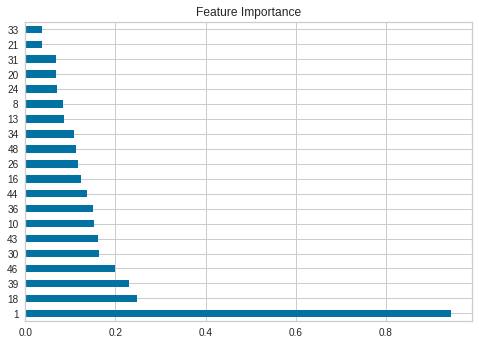

In [ ]:
importance = lr_clf_scaled.coef_[0]
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

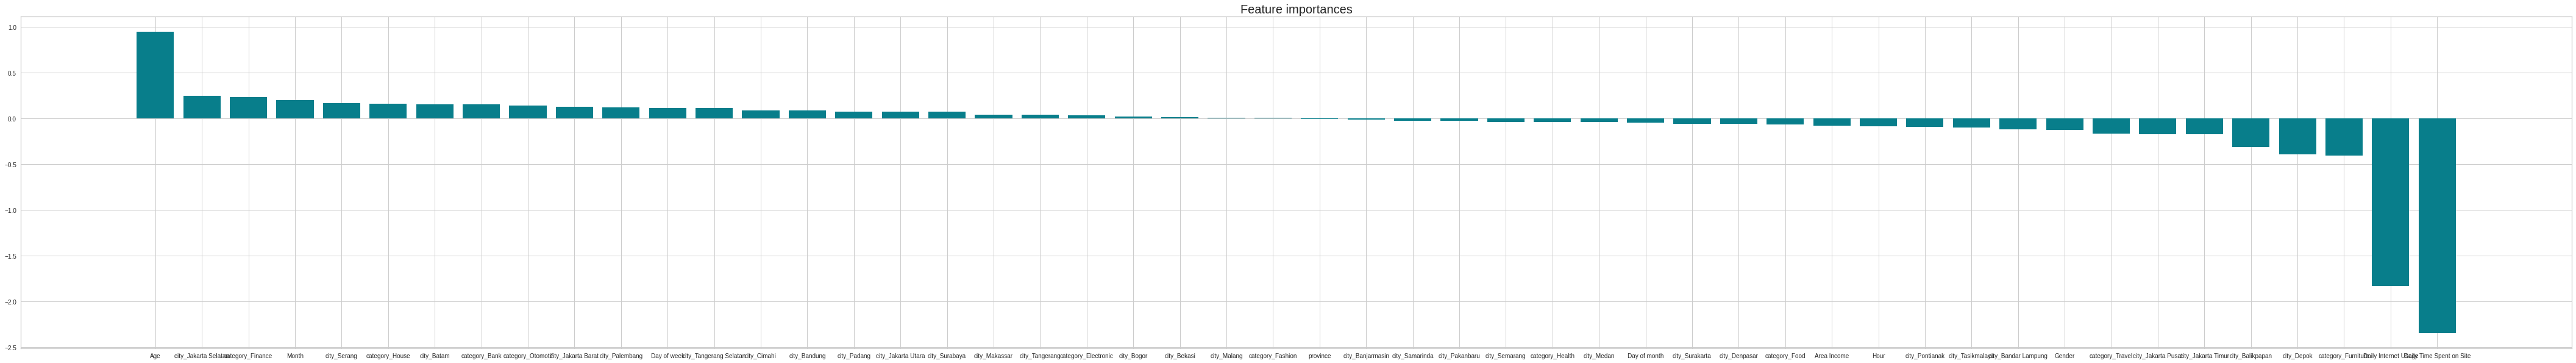

In [ ]:
importances = pd.DataFrame(data={'Attribute': X_train_scal.columns,'Importance': lr_clf_scaled.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(75, 10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.show()

10 Large Feature Importance
* Age
* city_Jakarta_Selatan
* category_Finance
* Month
* city_Serang
* category_House
* city_Batam
* category_Bank
* category_Otomotif
* city_Jakarta_Barat

# Part 4
1. Buatlah rekomendasi bisnis berdasarkan feature important. (Hint: Hubungkan hasil dari EDA dan feature important sebagai bahan kajian rekomendasi bisnis)
2. Buatlah simulasi bisnis dengan tanpa menggunakan hasil dari model machine learning dengan menunjukan cost, revenue, serta profit dari marketing tersebut. (Hint: Jumlah user dan biaya pemasaran pada simulasi pertama dan kedua harus sama, perhatikan conversion rate yang terdampak pada revenue dan profit)
3. Buatlah simulasi bisnis dengan menggunakan hasil dari model machine learning dengan menunjukan cost, revenue, serta profit dari marketing tersebut. (Hint: Perhatikan conversion rate yang tinggi dapat meningkatkan hasil dari target marketing)

##1. Buatlah rekomendasi bisnis berdasarkan feature important

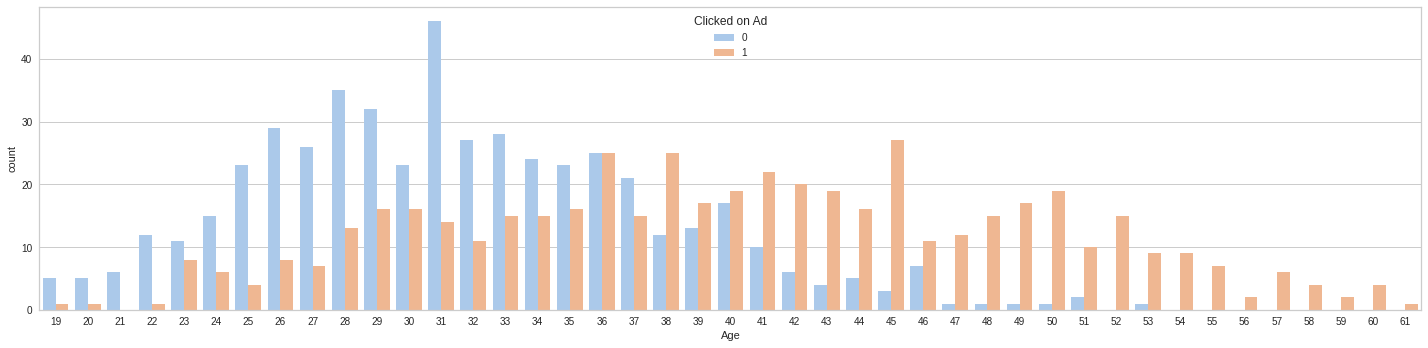

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x=df1['Age'], palette='pastel', orient='h', hue=df1['Clicked on Ad'])
plt.tight_layout()

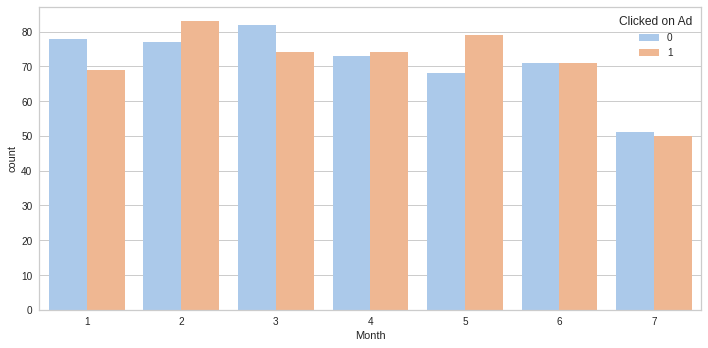

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x=df1['Month'], palette='pastel', orient='h', hue=df1['Clicked on Ad'])
plt.tight_layout()

1) Mengoptimalkan kampanye iklan untuk tingkat konversi setinggi mungkin.

* Kelompok usia Pengguna 30-50 harus menjadi target utama.
* Pengguna di bulan Juli terendah harus dicek kembali kenapa menurun dan iklan apa yang ditanyangkan.
* Kategori iklan mengenai Finance, House, Bank dan Otomotif harus lebih banyak.

2) Menemukan demografi target yang sempurna dan disesuaikan dengan kategori yang paling banyak diminati.

* Pengguna di Kota Jakarta Selatan paling banyak click iklan 
, Serang Batam, dan Jakarta Barat

##2. Buatlah simulasi bisnis dengan tanpa menggunakan hasil dari model machine learning dengan menunjukan cost, revenue, serta profit dari marketing tersebut

Profit = Revenue (Total Pendapatan) - Cost(Total Biaya)

A. Perusahaan menghitung keseluruhan biaya yang dikeluarkan untuk menjalankan iklan online (Januari-Juni), dengan rincian sebagai berikut:
* Biaya pembuatan dan penayangan iklan : Rp 8.750.000
* Monthly cost untuk karyawan dan sewa toko (10.000.000 X 7 Bulan) : 70.000.000
* Biaya lain-lain : Rp 2.250.000
* Total Biaya: Rp 81.000.000

B. Perusahaan menghitung pendapatan yang dihasilkan dari iklan (Januari-Juni), dengan rincian berikut:
* Traffic (pengguna aplikasi yang click iklan)
1. January = 69 pengguna
2. February = 83 pengguna
3. March = 74 pengguna
4. April = 74 pengguna
5. May = 79 pengguna
6. June = 71 pengguna
7. July = 50 pengguna
* Conversion (pengguna yang membeli setelah melihat iklan)
1. January = 16
2. February = 15
3. March = 17
4. April = 16
5. May = 14
6. June = 13
7. July = 10
* Monthly Revenue
1. January = 16.000.000
2. February = 15.000.000
3. March = 17.000.000
4. April = 16.000.000
5. May = 14.000.000
6. June = 13.000.000
7. July = 10.000.000

Profit = Rp 101.000.000 - Rp 81.000.000 = Rp 20.000.000

ROAS = Rp 101.000.000 : Rp 81.000.000 = 1,25

Dari perhitungan diatas dapat diketahui bahwa perusahaan mendapatkan revenue sebesar Rp 1,25 dari setiap Rp 1 yang mereka keluarkan untuk beriklan.

##3. Buatlah simulasi bisnis dengan menggunakan hasil dari model machine learning dengan menunjukan cost, revenue, serta profit dari marketing tersebut

* Mengurangi biaya: Menjalankan campaign iklan online sendiri akan menyita banyak waktu dan tenaga Anda. Pertimbangkan untuk menggunakan jasa digital advertising untuk membantu Anda dalam menjalankan campaign iklan yang lebih efektif.
* Mempersempit target audience: Menargetkan audience yang sangat spesifik dapat mengurangi biaya iklan Anda dan juga meningkatkan potensi konversi dari iklan tersebut.
* Menjalankan A/B testing: Lakukan A/B testing untuk mencari tahu iklan mana yang paling efektif dan gunakan hasil eksperimen tersebut untuk menonaktifkan iklan yang kurang efektif.

Profit = Revenue (Total Pendapatan) - Cost(Total Biaya)

A. Perusahaan menghitung keseluruhan biaya yang dikeluarkan untuk menjalankan iklan online (Agustus-Desember), dengan rincian sebagai berikut:
* Biaya penayangan iklan di aplikasi (1.500.000 X 5 bulan) : Rp 7.500.000
* Monthly cost untuk karyawan dan sewa toko (10.000.000 X 5 Bulan) : 50.000.000
* Biaya lain-lain : Rp 1.500.000
* Total Biaya: Rp 59.000.000

B. Perusahaan menghitung pendapatan yang dihasilkan dari iklan (Agustus-Desember), dengan rincian berikut:
* Traffic (pengguna aplikasi yang click iklan)
1. August = 100 pengguna
2. September = 110 pengguna
3. October = 120 pengguna
4. November = 130 pengguna
5. December = 140 pengguna
* Conversion (pengguna yang membeli setelah melihat iklan)
1. August = 20 pengguna
2. September =22 pengguna
3. October = 25 pengguna
4. November = 30 pengguna
5. December = 34 pengguna
* Monthly Revenue
1. August = 20.000.000
2. September =22.000.000
3. October = 25.000.000
4. November = 30.000.000
5. December = 34.000.000

Profit = Rp 133.000.000 - Rp 59.000.000 = Rp 83.000.000

ROAS = Rp 133.000.000 - Rp 59.000.000 = 2,25

Dari perhitungan diatas dapat diketahui bahwa perusahaan mendapatkan revenue sebesar Rp 2,25 dari setiap Rp 1 yang mereka keluarkan untuk beriklan.